# MNIST Fashion Image Classification

## Import required packages

In [1]:
import os
import gzip
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

## Load data

In [2]:
def load_fashion_mnist_data(path):
    # train labels
    with gzip.open(os.path.join(path, "train-labels-idx1-ubyte.gz"), 'rb') as label_path:
        train_labels = np.frombuffer(label_path.read(), dtype=np.uint8, offset=8)

    # train images
    with gzip.open(os.path.join(path, "train-images-idx3-ubyte.gz"), 'rb') as image_path:
        train_images = np.frombuffer(image_path.read(), dtype=np.uint8, offset=16).reshape(len(train_labels), 28, 28)

    # test labels
    with gzip.open(os.path.join(path, "t10k-labels-idx1-ubyte.gz"), 'rb') as label_path:
        test_labels = np.frombuffer(label_path.read(), dtype=np.uint8, offset=8)

    # test images
    with gzip.open(os.path.join(path, "t10k-images-idx3-ubyte.gz"), 'rb') as image_path:
        test_images = np.frombuffer(image_path.read(), dtype=np.uint8, offset=16).reshape(len(test_labels), 28, 28)

    # labels
    labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    return train_images, train_labels, test_images, test_labels, labels

mnist_fashion_data_folder = "mnist_fashion/01_data"
train_images, train_labels, test_images, test_labels, labels = load_fashion_mnist_data(mnist_fashion_data_folder)

## Explore data


In [3]:
print("Training Set")
print("============")
print(f"Shape  : {train_images.shape}")
print(f"Labels : {sorted(set(train_labels))}")

print("")

print("Test Set")
print("============")
print(f"Shape  : {test_images.shape}")
print(f"Labels : {sorted(set(test_labels))}")

Training Set
Shape  : (60000, 28, 28)
Labels : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Test Set
Shape  : (10000, 28, 28)
Labels : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


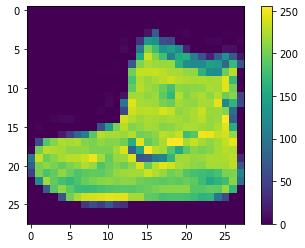

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess data

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

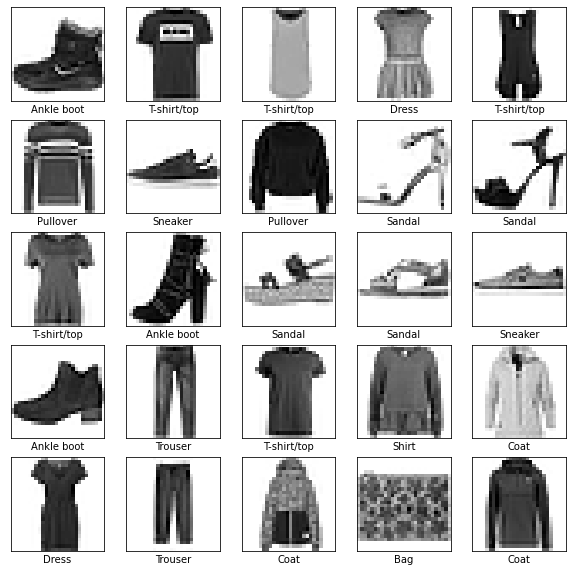

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i]])
plt.show()

## Build model

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train model

In [8]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.5008 - accuracy: 0.8247
Epoch 2/10
60000/60000 [==============================] - 12s 206us/sample - loss: 0.3783 - accuracy: 0.8638
Epoch 3/10
60000/60000 [==============================] - 12s 206us/sample - loss: 0.3423 - accuracy: 0.8743
Epoch 4/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.3152 - accuracy: 0.8839
Epoch 5/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.2974 - accuracy: 0.8907
Epoch 6/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.2828 - accuracy: 0.8945
Epoch 7/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.2706 - accuracy: 0.8994
Epoch 8/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2595 - accuracy: 0.9030
Epoch 9/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2489 - accuracy: 0.90

## Evaluate model

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 2s - loss: 0.3459 - accuracy: 0.8810


## Use model for predictions

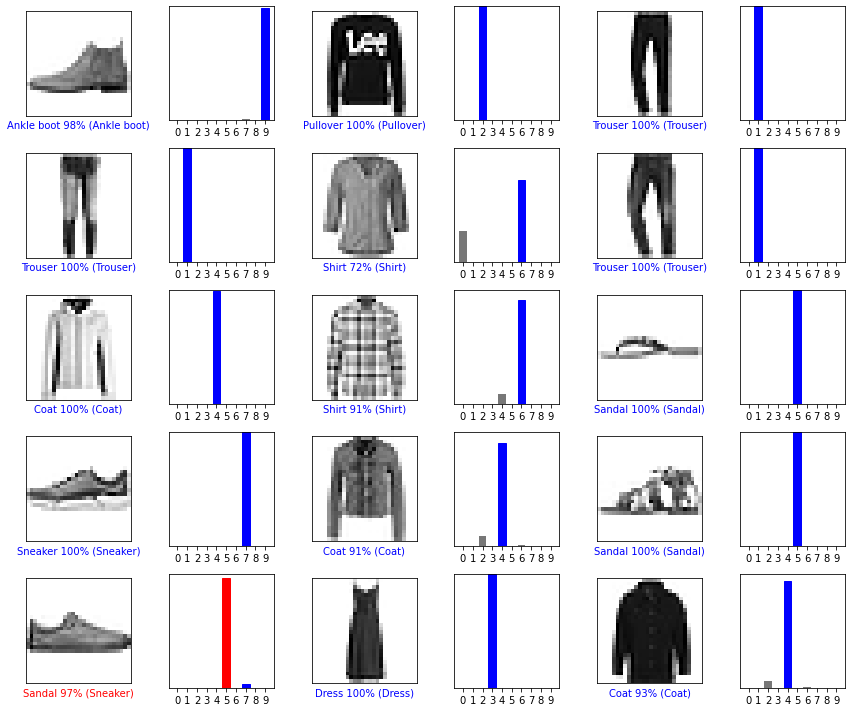

In [10]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


predictions = model.predict(test_images)


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()